In [20]:
!pip install pandas
!pip install scikit-learn
!pip install xgboost
!pip install matplotlib

### Setup 
Import required processing library 

In [21]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import xgboost as xg
print(xg.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

2.0.2
1.23.5
1.7.6


In [22]:
# check xgboost version
data_path = "..\Data\Final_Data_With_TVD.csv"
df = pd.read_csv(data_path)
print("\nLoaded Data :", data_path, "\n----------------------------------------------")
print("\n","\n",df.head())


Loaded Data : ..\Data\Final_Data_With_TVD.csv 
----------------------------------------------

 
     WELL  mTVDSS  Northing    Easting  \
0  107.0  2550.4  839440.1  2516323.0   
1  107.0  2550.5  839440.1  2516323.0   
2  107.0  2550.7  839440.2  2516323.0   
3  107.0  2550.8  839440.2  2516323.0   
4  107.0  2551.0  839440.2  2516323.0   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         34.140   
1                                         33.889   
2                                         33.504   
3                                         33.074   
4                                         32.755   

   BRIT_IND.                     :  Brittleness Index  \
0                                             38.377    
1                                             38.336    
2                                             38.968    
3                                             39.797    
4                                             40.163    

### Checking data distribution

In [4]:
## plotting the bar graph of data
# df.plot(kind = 'bar')

### Normalization

In [23]:
df_max_scaled = df.copy()
i = 0  
# apply normalization techniques
for column in df_max_scaled.iloc[:,1:-1].columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
## view normalized data
display(df_max_scaled)

,WELL,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,SHMIN_GRAD. : Horizontal Stress Gradient (Min),STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure
0,107.0,0.725009,0.999859,0.999301,0.034166,0.288380,0.335766,0.191420,0.610207,0.085730,...,0.001686,0.588645,0.191434,0.441660,0.523868,0.669004,0.515452,0.246798,0.156573,4970.330
1,107.0,0.725037,0.999859,0.999301,0.033914,0.288072,0.341791,0.187339,0.604484,0.086639,...,0.001682,0.574730,0.188694,0.435218,0.518374,0.666790,0.511768,0.243030,0.153697,4970.452
2,107.0,0.725094,0.999859,0.999301,0.033529,0.292821,0.359095,0.183354,0.595729,0.088053,...,0.001671,0.563826,0.186028,0.425456,0.510050,0.660517,0.508325,0.239263,0.150898,4970.574
3,107.0,0.725122,0.999859,0.999301,0.033099,0.299050,0.381405,0.178351,0.586081,0.089645,...,0.001658,0.554223,0.182703,0.414832,0.500990,0.652768,0.505164,0.234605,0.147477,4970.696
4,107.0,0.725179,0.999859,0.999301,0.032780,0.301800,0.395424,0.173626,0.578972,0.090842,...,0.001649,0.545325,0.179579,0.407091,0.494389,0.647970,0.502050,0.230221,0.144212,4970.817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41881,97.0,0.996492,0.997326,0.999776,0.041938,0.518493,0.387396,0.475360,0.807657,0.060730,...,0.001500,0.784524,0.415210,0.694548,0.739521,0.650923,0.747961,0.511336,0.389956,5359.277
41882,97.0,0.996535,0.997326,0.999776,0.042285,0.524519,0.377663,0.489525,0.817517,0.059751,...,0.001508,0.788764,0.428076,0.708768,0.751648,0.653875,0.756454,0.524488,0.403405,5359.286
41883,97.0,0.996578,0.997326,0.999776,0.042789,0.523084,0.350328,0.504133,0.832080,0.058342,...,0.001530,0.800776,0.441521,0.730052,0.769798,0.663469,0.763567,0.538119,0.417399,5359.294
41884,97.0,0.996622,0.997326,0.999776,0.043206,0.529344,0.336148,0.521310,0.844330,0.057191,...,0.001541,0.807149,0.457547,0.748215,0.785287,0.668635,0.772839,0.554079,0.434113,5359.302


In [6]:
## plotting after normalization
# df_max_scaled.plot(kind = 'bar')

### Splitting
##### X,y splitting and then further dividing testing and training dataset

In [24]:
X, y = df_max_scaled.iloc[lambda x: x.index % 50 == 0, :-1], df_max_scaled.iloc[lambda x: x.index % 50 == 0, -1]
print("\n", X.head(), "\n", y.head())


       WELL    mTVDSS  Northing   Easting  \
0    107.0  0.725009  0.999859  0.999301   
50   107.0  0.727112  0.999861  0.999301   
100  107.0  0.729216  0.999863  0.999301   
150  107.0  0.731376  0.999863  0.999300   
200  107.0  0.733508  0.999865  0.999300   

     ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         0.034166   
50                                        0.032547   
100                                       0.031759   
150                                       0.031515   
200                                       0.030005   

     BRIT_IND.                     :  Brittleness Index  \
0                                             0.288380    
50                                            0.276304    
100                                           0.228107    
150                                           0.272810    
200                                           0.311810    

     BRIT_PR.                     :  Brittleness Inde

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



         WELL    mTVDSS  Northing   Easting  \
17650  105.0  0.955156  0.999555  0.999489   
40500   97.0  0.936663  0.997325  0.999776   
33150   99.0  0.867767  0.997719  0.999833   
33000   99.0  0.861269  0.997719  0.999833   
26450  101.0  0.842377  0.997931  1.000000   

       ANGLE_FAIL.DEG                  :  Fail Angle  \
17650                                       0.045597   
40500                                       0.044896   
33150                                       0.041091   
33000                                       0.039988   
26450                                       0.042744   

       BRIT_IND.                     :  Brittleness Index  \
17650                                           0.707743    
40500                                           0.664475    
33150                                           0.463225    
33000                                           0.525910    
26450                                           0.566540    

       BRIT_PR.  

### Instantiation

In [26]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)
# xgb_r = xg.XGBRegressor(objective ='reg:linear',
#                   n_estimators = 10, seed = 123)

In [41]:
# Parameter dictionary specifying base learner
param = {"eta":0.3,
         "booster":"gblinear", "objective":"reg:linear"}
epochs = 10000
# params={"max_depth" : 4,
#          "eta":0.3,
#         'objective':'reg:squarederror'}
# cv_results = xg.cv(dtrain=train_dmatrix, params=params, nfold=3, metrics={'rmse'}, as_pandas=True, seed=20)
# print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = epochs)
pred = xgb_r.predict(test_dmatrix)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,pred)

[06:27:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  25.449512


0.9560887113598447

In [470]:
# accuracy_score(test_y, pred)
# import sklearn

RMSE :  25.449512

 R^2 Score: 0.956089


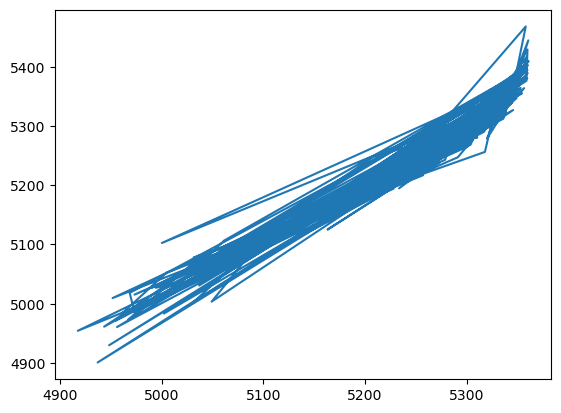

In [42]:
##Predictions
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_scor = r2_score(test_y,pred)
print("\n R^2 Score: %f" %(r2_scor))
# print("\n testing values: ", test_y, pred)
plt.plot(test_y,pred)
# print("predicted values: \n ", pred, "\n")


### Hyperparameter tuning

For hyperparameter tuning of different paramters to increase the accuracy.

In [418]:
# hyper_X, hyper_y = df.iloc[lambda x: x.index % 1000 == 0, :-1], df.iloc[lambda x: x.index % 1000 == 0, -1]

# hypertrain_X, hypertest_X, hypertrain_y, hypertest_y = train_test_split(hyper_X, hyper_y,
#                       test_size = 0.3, random_state = 123)

In [43]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01,0.03,0.1,0.3], 'n_estimators': [100,1000,10000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best set of hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 10000}
Best score:  -1.7701639680887085


### Feature importance calculation

In [44]:
xgb_r.get_score(importance_type='weight')

# plt.bar(range(len(feature_importance)), list(feature_importance.values()), align='center')
# plt.show()
# plt.xticks(range(len(feature_importance)), list(feature_importance.keys()))

{'WELL': 0.3444839417934418,
 'mTVDSS': 178.34169006347656,
 'Northing': -236.65663146972656,
 'Easting': 382.11669921875,
 'ANGLE_FAIL.DEG                  :  Fail Angle': -13183.724609375,
 'BRIT_IND.                     :  Brittleness Index': 1634.8885498046875,
 "BRIT_PR.                     :  Brittleness Index from Poisson's Ratio": 856.6549072265625,
 "BRIT_YM.                     :  Brittleness Index from Young's Modulus": -962.1739501953125,
 'CS   .M/MIN                 :  Compressive Strength': 702.6813354492188,
 'DTCO .US/F                 :  Compressional slowness': 6605.544921875,
 'DTSM .US/F                 :  Fast Shear Slowness': -1167.8172607421875,
 'IP   .RAYL/M2                 :  P Impedence': -468.2052307128906,
 'IS   .RAYL/M2                 :  S Impedance': 836.3960571289062,
 'KBULK.                     :  Bulk Mudulus': 17918.1484375,
 'LAMBDA.                     :  Lambda': -22748.4765625,
 'LAMRHO.                     :  ': -31.858810424804688,
 'MU   .

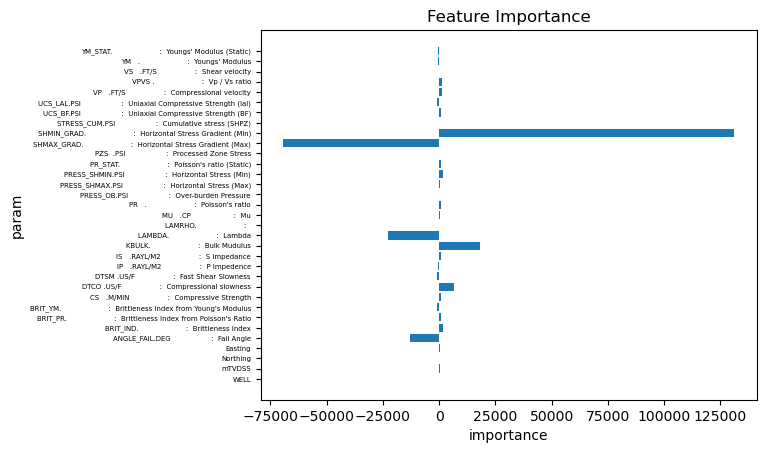

In [45]:
feature_importance = xgb_r.get_score(importance_type='weight')
y=list(feature_importance.keys())
 
# getting values against each value of y
x=list(feature_importance.values())
plt.barh(y, x)
# setting label of y-axis
plt.ylabel("param")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()


### After Feature Selection

In [77]:
# print(feature_importance.keys())
drop_col = []
thres = 200
j = -1
for val in feature_importance.values():
    j+=1
    if(abs(val)<thres):
        for i,v in enumerate(feature_importance):
            if i == 0 or i == 1 or i == 2 or i == 3:
                continue
            if i == j:
                drop_col.append(v)
                print(v)

PZS  .PSI                  :  Processed Zone Stress
STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)


In [78]:
# drop_col = []
df_drop_col_scaled = df_max_scaled.drop(drop_col,axis = 1)
# df.drop(['A'], axis=1)

### Repeating the process again

In [79]:
X, y = df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, 1:-1], df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, -1]
# print("\n", X.head(), "\n", y.head())
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



          mTVDSS  Northing   Easting  \
38930  0.868646  0.997325  0.999776   
2700   0.840480  0.999918  0.999285   
1040   0.769554  0.999879  0.999295   
18590  0.753711  0.998010  0.999692   
8300   0.837694  0.999595  0.999276   

       ANGLE_FAIL.DEG                  :  Fail Angle  \
38930                                       0.039446   
2700                                        0.046076   
1040                                        0.044290   
18590                                       0.027859   
8300                                        0.041168   

       BRIT_IND.                     :  Brittleness Index  \
38930                                           0.454305    
2700                                            0.720359    
1040                                            0.604322    
18590                                           0.062670    
8300                                            0.499286    

       BRIT_PR.                     :  Brittleness Index fr

In [80]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)
# xgb_r = xg.XGBRegressor(objective ='reg:linear',
#                   n_estimators = 10, seed = 123)

In [81]:
# Parameter dictionary specifying base learner
param = {"eta":0.03,
         "booster":"gblinear", "objective":"reg:linear"}
epochs = 5000
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = epochs)
pred = xgb_r.predict(test_dmatrix)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,pred)

[06:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  29.110977


0.9403087480357509

RMSE :  29.110977

 R^2 Score: 0.940309


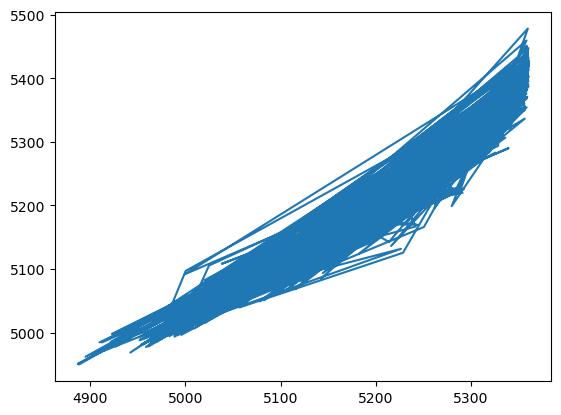

In [82]:
##Predictions
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
r2_scor = r2_score(test_y,pred)
print("\n R^2 Score: %f" %(r2_scor))
plt.plot(test_y, pred)
# print("predicted values: \n ", pred, "\n")

### Visualizing the results

In [83]:
df_107 = df_drop_col_scaled.iloc[:6000]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[lambda x: x.index % 149 == 0, 1:-1], df_107.iloc[lambda x: x.index % 149 == 0, -1]
test_dmatrix_107 = xg.DMatrix(data = X_107, label = y_107)
# X_TVD_107

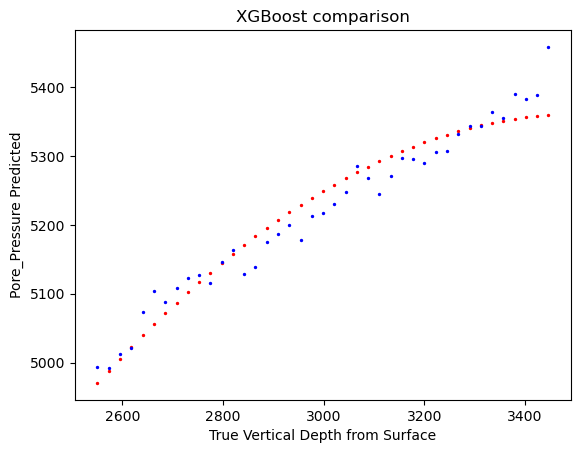

In [84]:
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107, color = 'red', s = 2)
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(), xgb_r.predict(test_dmatrix_107), color = 'blue', s=2)
plt.title('XGBoost comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pore_Pressure Predicted')
plt.show()

### Hyperparam tuning again for new dataset

In [71]:
param_grid = {
    'learning_rate': [0.01,0.03,0.1,0.3], 'n_estimators': [1000,2000,5000,10000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor(verbose=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid,refit = True, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[06:37:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:38:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:38:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:38:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:38:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows

[06:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:44:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[06:44:42] WARN

### Second Time Feature Selection

In [85]:
xgb_r.get_score(importance_type='weight')

{'mTVDSS': 411.3233337402344,
 'Northing': 335.01837158203125,
 'Easting': 296.18658447265625,
 'ANGLE_FAIL.DEG                  :  Fail Angle': 973.8302612304688,
 'BRIT_IND.                     :  Brittleness Index': 232.52513122558594,
 "BRIT_PR.                     :  Brittleness Index from Poisson's Ratio": 979.8131713867188,
 "BRIT_YM.                     :  Brittleness Index from Young's Modulus": -114.98697662353516,
 'CS   .M/MIN                 :  Compressive Strength': 245.54739379882812,
 'DTCO .US/F                 :  Compressional slowness': 2683.505859375,
 'DTSM .US/F                 :  Fast Shear Slowness': 510.99981689453125,
 'IP   .RAYL/M2                 :  P Impedence': 289.4582214355469,
 'IS   .RAYL/M2                 :  S Impedance': 262.4076843261719,
 'KBULK.                     :  Bulk Mudulus': -2142.99169921875,
 'LAMBDA.                     :  Lambda': -2693.398681640625,
 'LAMRHO.                     :  ': 188.2928009033203,
 'MU   .CP                   

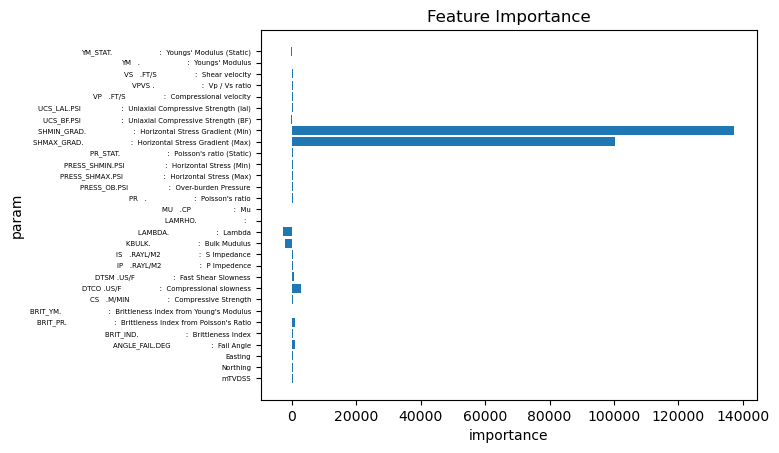

In [86]:
feature_importance = xgb_r.get_score(importance_type='weight')
y=list(feature_importance.keys())
 
# getting values against each value of y
x=list(feature_importance.values())
plt.barh(y, x)
# setting label of y-axis
plt.ylabel("param")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()